### Author: Mohsen Ghazel (mghazel)
* Date: March 9th, 2021

# **Project: Recognizing hand-written digits using Machine Learning (ML) models in Scikit-Learn:**

*    The objective of this project is to demonstrate how to use scikit-learn to recognize images of hand-written digits, from 0-9.
*    We shall apply a standard Machine Learning (ML) via Scikit-Learn process, with the following steps:

1.   Load the input data set and split into training and test data subsets 
     *   The DIGITS dataset of handwritten digits in the Scikit-Learn database
     *   A set of 1,797 labeled examples
     *   It is a small subset of a larger set available from MNIST, which contains 70,000 images. 
     *   The DIGITS have been size-normalized and centered in a fixed-size grayscale image (8x8x1 pixels)
     *   This is different from the full MNIST data set, where the grayscale images are 28x28x1 pixels.

2.   Select and build a ML classification algorithm from scikit-learn API:
    * We shall explore the performance of the following ML algorithms: 

        * LogisticRegression
        * DecisionTree and Random Forest
        * Multilayer Perceptron (MLP) 
        * Support Vector Machines (SVM)

3.   Train the selected ML model

4.   Deploy the trained on the test data 

5.   Evaluate the performance of the trained model using evaluation metrics:
    *    Accuracy
    *    Confusion Matrix
    *    Other metrics derived form the confusion matrix

6.   Perform hyperparameter search and fine-tuning to identify more optimal ML model paramaters:
    *   Explore grid-search and random-search to identify the parameter
    *   Train the selected model using the identified hyperparameters
    *   Deploy the improved trained on the test data 
    *   Evaluate the performance of the improved model

7.   Compare the performance of the various trained ML models using evaluation metrics:
    *    Accuracy
    *    Confusion Matrix
    *    Other metrics derived form the confusion matrix.

    

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


#**Step 0: Python imports and global variables:**

###**0.1) Standard scientific Python imports:**

In [2]:
# matplotlib
import matplotlib.pyplot as plt
# numpy
import numpy as np

# random number generators values
# seed for reproducing the random number generation
from random import seed
# random integers: I(0,M)
from random import randint
# random standard guassian: N(0,1)
from random import gauss
# random standard unform: U(0,1)
from random import random

# time
import datetime

# scikit-learn datasets
from sklearn import datasets
# split-data into training and testing data subsets
from sklearn.model_selection import train_test_split

# MLP classifier
from sklearn.neural_network import MLPClassifier

# classifiers and performance metrics
# metrics
from sklearn import metrics
# confusion_matrix
from sklearn.metrics import confusion_matrix
# classification_report
from sklearn.metrics import classification_report

# Hyperparameter search and fine-tuning:
# - In recent versions, these modules are now under sklearn.model_selection, and 
#   not any more under sklearn.grid_search.
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# GridSearchCV
from sklearn.model_selection import GridSearchCV


###**0.2) Global variables:**

In [3]:
# -set the random_state seed = 101 for reproducibilty
random_state_seed = 101

In [4]:
# set a flag-parameter to indicate whether or not normalization is applied
# - normalize_images_flag = 0: normalization is not applied
# - normalize_images_flag = 1: normalization is applied
normalize_images_flag = 0

In [5]:
# the number of visualized images
num_visualized_images = 20

In [6]:
# fraction of the test data
test_data_fraction = 0.20

#**Step 1: Load the data and split it into training and testing data subsets:**

###**1.1) Download DIGITS dataset: Hand-written digits**
*   The DIGITS dataset of handwritten digits in the Scikit-Learn database
*   A set of 1,797 labeled examples
*   It is a small subset of a larger set available from MNIST, which contains 70,000 images. 
*   The DIGITS have been size-normalized and centered in a fixed-size grayscale image (8x8x1 pixels)
*   This is different from the full MNIST data set, where the grayscale images are 28x28x1 pixels.

In [7]:
# Download the digits dataset from sklearn datasets
digits = datasets.load_digits()

###**1.2) Explore the downloaded data set:**
*    DIGITS dataset is downloaded as Buch/dictionary and accessible via (keys, values)

In [8]:
# check the type of digits
type(digits)

sklearn.utils.Bunch

####**1.2.1) Check the keys:**

In [9]:
# display the keys of mnist
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


####**1.2.2) Check the description of the dataset:**

In [10]:
# display the description of the MNIST dataset
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

####**1.2.3) Check the input images:**
*   Each 8x8 image has been flattened into a feature vector of length 64 pixels

In [11]:
# set the feature vector X
X = digits.data
# Display the feature vector shape
print('The shape of the features: X = ({0}, {1})'.format(X.shape[0], X.shape[1]))
# the total number of images
total_num_images = X.shape[0]
print("MNIST contains {} images.".format(total_num_images))

The shape of the features: X = (1797, 64)
MNIST contains 1797 images.


####**1.2.4) The classes/targets:**
*   The classification of the digits: 0 to 9

In [12]:
# Set the target vector y
y = digits.target
# the shape of the target vector
print('The shape of the targets: y = {0}'.format(y.shape[0]))
# the unique targets (0-9)
print('The unique targets: ' + str(np.unique(y)))

The shape of the targets: y = 1797
The unique targets: [0 1 2 3 4 5 6 7 8 9]


####**1.2.5) Visualize some of the images and their associated targets:**
*   We visualize randomly selected images and their asssociated labels 


In [13]:
"""
# A utility function to visualize multiple images:
"""
def visualize_images_and_labels(num_visualized_images = 20):
  """To visualize images.

      Keyword arguments:
         - num_visualized_images -- the number of visualized images (deafult 20)
      Return:
         - None
  """
  # the suplot grid shape
  num_rows = 1
  num_cols = num_visualized_images
  # setup the subplots axes
  _, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(2* num_visualized_images, 0.50))
  # set a seed random number generator for reproducible results
  seed(random_state_seed)
  # iterate over the sub-plots
  for ax in axes:
      # turn-off subplot axes
      ax.set_axis_off()
      # generate a random image counter
      counter = randint(0, total_num_images)
      # get the flattened image and reshape it into 8x8 pixls
      image = X[counter,:].reshape(8,8)
      # get the target associated with the image
      label = y[counter]
      # display the image
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      # set the title showing the image label
      ax.set_title('y =' + str(label))

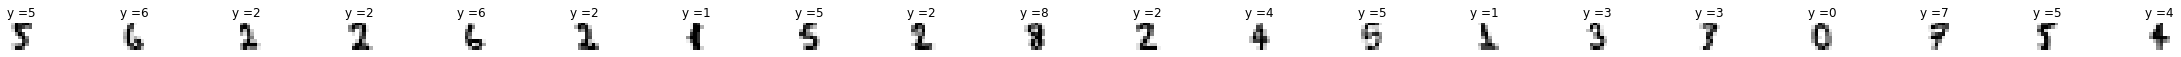

In [14]:
# call the function to visualize the input images
visualize_images_and_labels(20)

####**1.2.6) Split the data into training and testing subsets:**
*   Use 20 percent of data set for testing  
*   Use 80 percent of data set for training


In [15]:
# Split the data into training (0.2) and testing (0.2) data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_fraction, random_state = random_state_seed, shuffle=False)

In [16]:
# check the number of training images
num_train_images = X_train.shape[0]
print('Number of train images = {}'.format(num_train_images))
# check the number of test images
num_test_images = X_test.shape[0]
print('Number of test images = {}'.format(num_test_images))

Number of train images = 1437
Number of test images = 360


####**1.2.7) Examine the number of image for each class:**

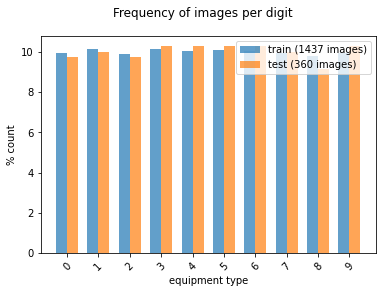

In [17]:
# create a histogram of the number of images in each class/digit:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('Frequency of images per digit')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} images)'.format(len(y_train)), 
    'test ({0} images)'.format(len(y_test))
]);

####**1.2.8) Normalize the training and testing features X_train and X_test:**
*   Grayscale image values range from 0 to 255
*   Scale by 255 to normalize the range betwen 0 and 1
    * We experimented with normalizing the input images
    * However, no significant benefits are observed
    * In fact, we obtained better performance when:
        *   Use original images instead of normalized images for training and test
        *   Perform hyper-paramaters search and fine-tuning for the MLP classifier model.

In [18]:
# nomalize the train and test images if desired
if ( normalize_images_flag == 1):
  # normalize X_train
  X_train =  X_train / 255
  # normalize X_test
  X_test =  X_test / 255

#**Step 2: Select and instantiate the Scikit-Learn ML model:**
*    Train a MLP classifier model to classify the images

###**2.1) Select and import the trained ML model:**

In [19]:
# Instantiate the MLP classifier
mlp_model = MLPClassifier()

#**Step 3: Train the selected MLP model using the training data:**
* Train a MLP model on the training images

In [20]:
# Train the MLP model and printout its configuration parameters
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#**Step 4: Deploy the trained model to predict the classification of the test data:**
* Deploy the trained MLP model to classify the test images

In [21]:
# Predict the value of the digits for test data set
mlp_yhat = mlp_model.predict(X_test)

###**4.1) Visualize some of the test images and their predicted targets:**
*   Visualize 20 randomly selected test images and their associated predicted labels 

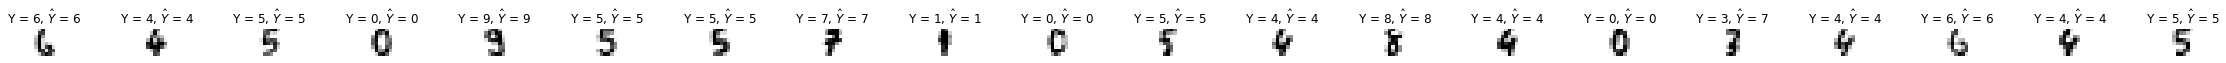

In [22]:
 # the suplot grid shape
num_rows = 1
num_cols = num_visualized_images
# setup the subplots axes
_, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(2 * num_visualized_images, 0.50))
# set a seed random number generator for reproducible results
seed(random_state_seed)
# iterate over the axes
for ax in axes:
    # turn axes off
    ax.set_axis_off()
    # generate a random image counter
    counter = randint(0, num_test_images)
    # get the flatten image and reshape it as 8x8 2D grayscale image
    image = X_test[counter,:].reshape(8,8)
    # If the images were normalized, then scale them back by multiplying by 255:
    if ( normalize_images_flag == 1):
      image = image * 255
    # Get the actual label of the image
    label = y_test[counter]
    # Get the predicted of the image
    yhat = mlp_yhat[counter]
    # display the image
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # display its actual and predicted labels
    ax.set_title('Y = %i, $\hat{Y}$ = %i' % (int(label), int(yhat)))

#**Step 5: Evaluate the performance of the trained model:**
*   Evaluate the performance of the trained model using various performance metrics:
    *   classification report summary
    *   confusion matrix

###**5.1) The classification report:**
*   The classification_report uilds a text report showing the main classification metrics:

In [23]:
# Generate a classification_report
print(f"Classification report for MLP classifier {mlp_model}:\n"
      f"{metrics.classification_report(y_test, mlp_yhat)}\n")

Classification report for MLP classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.85      0.92      0.88        36
           2       1.00      1.00      1.00        35
           3       0.93      0.73      0.82        37
           4       0.94      0.92      0.93        37
           5       0.95      0.95      0.95        37
           6       0.97      0.97      0.97        37

###**5.2) The confusion matrix:**
*   Plot the true digit values and the predicted digit labels

Confusion matrix:
[[33  0  0  0  1  0  1  0  0  0]
 [ 1 33  0  1  0  0  0  0  0  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  1  0  2  7  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  2  0  0  0 35  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 1  2  0  0  1  0  0  0 29  0]
 [ 0  1  0  1  0  1  0  3  0 31]]


Text(0.5, 0.98, 'Confusion Matrix')

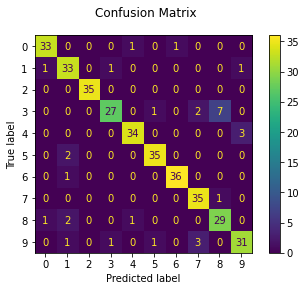

In [24]:
# We can also plot a confusion matrix of the true digit values and the predicted digit values.
disp = metrics.plot_confusion_matrix(mlp_model, X_test, y_test)
# display the confusion matrix
print(f"Confusion matrix:\n{disp.confusion_matrix}")
# visualize the confusion matrix
disp.figure_.suptitle("Confusion Matrix")

###**5.3) Overall accuracy:**
*   accuracy =  fraction of correct predictions = $\frac{\mbox{correct predictions}}{\mbox{total number of test images}}$ 
*   Basically, how the model performs on new data (test set)


In [25]:
# Use score method to get accuracy of model
score = mlp_model.score(X_test, y_test)
print('The overall accuracy = ' + str(score))

The overall accuracy = 0.9111111111111111


###**5.3) Examine some of the misclassified digits:**
*   Display some of the misclassified digits

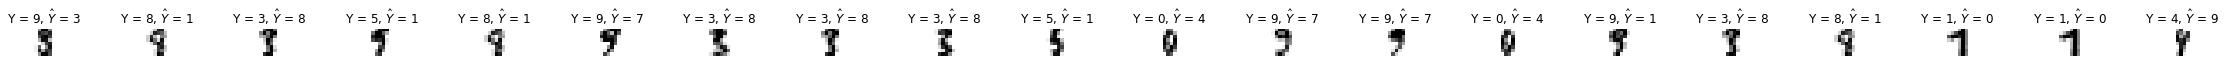

In [26]:
# - Find the indices of all the mis-classified examples
misclassified_idx = np.where(y_test != mlp_yhat)[0]
# setup the subplot grid for the visualized images
# grid number of rows
num_rows = 1
# grid number of columns
num_cols = num_visualized_images
# setup the subplots axes
_, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(2 * num_visualized_images, 0.50))
# set a seed random number generator for reproducible results
seed(random_state_seed)
# iterate over the axes
for ax in axes:
    # turn-off the axes
    ax.set_axis_off()
    # select a random mis-classified example
    counter = np.random.choice(misclassified_idx)
    # get the flattened test image and reshape as 8x8 grayscale image
    image = X_test[counter,:].reshape(8,8)
    # If the images were normalized, then scale them back by multiplying by 255:
    if ( normalize_images_flag == 1):
      image = image * 255
    # get the true labels of the selected image
    label = y_test[counter]
    # get the predicted label of the test image
    yhat = mlp_yhat[counter]
    # display the image 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # display the true and predicted labels on the title of teh image
    ax.set_title('Y = %i, $\hat{Y}$ = %i' % (int(label), int(yhat)))

#**Step 6: Perform hyperparameter search and fine-tuning to identify more ptimal ML model paramaters and improve the model performance:**
*   Explore grid-search and random-search to identify the parameter
*   Train the selected model using the identified hyperparameters
*   Deploy the improved trained on the test data 
*   Evaluate the performance of the improved model.

*   The configuration paramaters of the MLP classifier model as as follows:
```
# MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
```
* We explore varying the values of the following 2 paramaters:

    *   alpha = 0.0001
    *   beta_1 = 0.90
    *   beta_2 = 0.999
    *   learning_rate_init = 0.001
    *   max_iter = 200
    *   momentum = 0.9





###**6.1) Use Grid-Search to perform hyper-paramater fine-tuning:**

####**6.1.1) Define the MLP classifier model with tuned-parameters using grid-search:**

In [ ]:
# define the parameters search grid
tuned_parameters = [{
            'alpha': [0.00001, 0.0001, 0.001, 0.01],
            'beta_1': [0.90, 0.99], 
            'beta_2': [0.90, 0.99, 0.999], 
            'learning_rate_init': [0.1, 0.01, 0.001, 0.0001], 
            'max_iter': [100000],
            'momentum': [0.90, 0.99]
        }]
# Instantiate the MLP classifier model with grid-search
mlp_model_grid = GridSearchCV(MLPClassifier(), tuned_parameters[0], verbose=3)
# fit the model 
mlp_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3125 candidates, totalling 15625 fits
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.913, total=   0.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.104, total=   0.2s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.662, total=   0.5s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.770, total=   0.4s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.833, total=   0.5s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.95, score=0.889, total=   0.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.95, score=0.885, total=   0.9s
[

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.861, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.931, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.878, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.958, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.930, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.910, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.924, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.892, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.948, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.927, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.910, total=  10.0s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.938, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.906, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.937, total=  10.0s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.913, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.868, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.868, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.899, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.941, total=   9.6s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.913, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.847, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.892, total=   9.6s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.854, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.951, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.906, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.691, total=   1.4s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.295, total=   0.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.617, total=   0.6s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.631, total=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.917, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.920, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.920, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.955, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.913, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.913, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.916, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.923, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.958, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.910, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.927, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.878, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.927, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.937, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.833, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.924, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.909, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.934, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.962, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.875, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.906, total=  10.0s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.864, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.934, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.948, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.500, total=   0.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.281, total=   0.2s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.533, total=   0.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.439, total

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.896, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.958, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.864, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.948, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.927, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.892, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.927, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.902, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.930, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.941, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.896, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.941, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.899, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.923, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.948, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.889, total=  10.0s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.931, total=  10.0s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.913, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.937, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.865, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.938, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.927, total=   9.6s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.927, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.372, total=   0.4s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.101, total=   0.2s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.237, total=   0.5s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.57

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.833, total=   9.6s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.906, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.808, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.913, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.847, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.806, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.875, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.836, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.826, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.885, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.872, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.871, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.868, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.892, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.865, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.861, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.847, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.882, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.909, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.889, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.885, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.826, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.878, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.913, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.309, total=   0.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.861, total=   0.5s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.662, total=   0.5s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.785, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.865, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.826, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.864, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.850, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.802, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.851, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.812, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.885, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.906, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.757, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.889, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.878, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.840, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.878, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.819, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.906, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.798, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.808, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.878, total=   9.8s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.830, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.875, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.777, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.882, total=   9.7s
[CV] alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.885, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.194, total=   0.4s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.788, total=   0.3s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.739, total=   0.3s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.864, tot

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.858, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.917, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.895, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.916, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.944, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.865, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.955, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.864, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.965, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.916, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.882, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.931, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.868, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.930, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.941, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.924, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.948, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.895, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.937, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.927, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.896, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.948, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.895, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.899, total=   9.9s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.941, total=   7.3s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.306, total=   0.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.785, total=   0.4s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.732, total=   0.5s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.92

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.95, score=0.394, total=   0.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.99, score=0.826, total=   0.5s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.99, score=0.875, total=   1.1s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.99, score=0.697, total=   0.9s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.99, score

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.878, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.962, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.889, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.941, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.934, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.882, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.903, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.934, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.906, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.902, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.865, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.917, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.927, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.958, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.916, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.896, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.903, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.861, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.955, total=  10.0s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.937, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.899, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.924, total=  10.0s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.871, total=   9.9s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.927, total=   9.9s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.906, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.604, total=   1.1s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.347, total=   0.5s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.686, total=   0.5s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.4

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.878, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.913, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.930, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.927, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.851, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.917, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.902, total=   9.9s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.927, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.958, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.903, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.951, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.913, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.958, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.861, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.924, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.899, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.948, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.930, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.809, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.917, total=  10.0s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.892, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.944, total=  10.0s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.948, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.503, total=   1.2s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.757, total=   0.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.425, total=   0.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.823, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.850, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.944, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.916, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.802, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.903, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.836, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.885, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.902, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.840, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.910, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.829, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.902, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.930, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.819, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.889, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.909, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.899, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.847, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.858, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.857, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.899, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.916, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.514, total=   0.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.097, total=   0.3s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.202, total=   0.4s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, moment

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.785, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.858, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.826, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.882, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.885, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.747, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.896, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.780, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.868, total=   9.6s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.909, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.819, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.840, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.857, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.895, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.899, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.833, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.858, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.854, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.833, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.916, total=   9.5s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.837, total=   9.8s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.875, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.808, total=   9.7s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.868, total=   9.9s
[CV] alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.95, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.913, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.684, total=   0.3s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.483, total=   0.3s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.178, total=   0.2s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.258, to

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.913, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.896, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.850, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.930, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.934, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.885, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.934, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.882, total=   9.9s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.955, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.923, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.889, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.938, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.906, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.951, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.930, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.903, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.931, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.875, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.902, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.920, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.882, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.920, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.909, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.955, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.920, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.490, total=   0.4s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.552, total=   0.5s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.432, total=   0.4s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.31

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.875, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.896, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.902, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.944, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.934, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.851, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.924, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.923, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.941, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.903, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.944, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.916, total=   9.5s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.944, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.934, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.892, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.920, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.885, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.962, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.951, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.913, total=   9.9s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.951, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.895, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.941, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.958, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.434, total=   0.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.417, total=   0.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.707, total=   1.1s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.3

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.854, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.892, total=   9.9s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.909, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.958, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.941, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.844, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.955, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.916, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.927, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.948, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.882, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.965, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.875, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.878, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.934, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.924, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.934, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.899, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.930, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.955, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.885, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.931, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.882, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.930, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.902, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.368, total=   0.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.288, total=   0.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.704, total=   0.5s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, s

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.826, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.903, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.801, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.923, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.861, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.865, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.917, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.854, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.895, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.937, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.833, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.865, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.868, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.861, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.882, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.833, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.868, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.850, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.857, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.875, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.868, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.868, total=   9.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.864, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.906, total=   9.9s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.909, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.201, total=   0.3s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.476, total=   0.6s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.178, total=   0.3s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, moment

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.865, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.878, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.819, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.829, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.906, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.799, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.878, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.798, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.868, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.902, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.778, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.844, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.840, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.857, total=   9.9s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.861, total=   9.9s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.830, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.830, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.794, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.868, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.857, total=  10.0s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.830, total=   9.9s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.885, total=   9.8s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.836, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.875, total=   9.7s
[CV] alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.99, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.920, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.385, total=   0.2s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.729, total=   0.3s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.470, total=   0.3s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.512, total=   4.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.721, total=   7.2s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.323, total=   1.5s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.465, total=   4.3s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.95, learning_rate_init=1e-05, max

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter=1000, momentum=0.95, score=0.930, total=   0.3s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter=1000, momentum=0.99, score=0.764, total=   0.4s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter=1000, momentum=0.99, score=0.892, total=   0.4s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter=1000, momentum=0.99, score=0.909, total=   0.6s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=0.001, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.878, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.524, total=   4.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.816, total=   5.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.693, total=   6.6s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.787, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.780, total=   6.3s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.756, total=   7.3s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.774, total=   7.1s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.99, learning_rate_init=1e-05, max_i

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.858, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.892, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.895, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.927, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.906, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.854, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.910, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.847, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.909, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.899, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.896, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.872, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.909, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.899, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.923, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.858, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.899, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.843, total=  10.0s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.909, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.909, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.882, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.924, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.777, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.930, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.920, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.191, total=   0.4s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.219, total=   0.1s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.436, total=   0.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=0.1, max_iter=100

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.826, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.896, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.767, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.861, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.871, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.823, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.892, total=   9.7s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.735, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.808, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.864, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.833, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.865, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.840, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.794, total=  10.0s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.861, total=  10.1s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.778, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.851, total=  10.0s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.829, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.889, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.913, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.819, total=   9.8s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.882, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.822, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.829, total=   9.9s
[CV] alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.999, beta_2=0.9999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.899, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.677, total=   0.3s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.253, total=   0.3s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.293, total=   0.1s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.9, learning_rate_init=0.1, max_iter=1000, momentum=0.9

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9, score=0.892, total=  10.1s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.670, total=   6.7s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.903, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.739, total=   8.1s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.756, total=   8.1s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.95, score=0.861, total=   7.3s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_in

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.861, total=  10.0s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.99, score=0.836, total=   6.2s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.826, total=   9.9s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.826, total=   6.1s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.662, total=   7.3s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.822, total=   7.8s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.999, score=0.770, total=  10.0s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.712, total=   5.8s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.351, total=   2.9s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.704, total=  10.0s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.700, total=   6.1s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.999, learning_rate_init=1e-05, max_iter=1000, momentum=0.9999, score=0.780, total=   6.6s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9, score=0.413, total=   1.1s
[CV] alpha=1e-06, beta_1=0.9999, beta_2=0.9999, learning_rate_init=0.1, max_iter=1000, momentum=0.9 
[CV]  alpha=1e-06, beta_1=0.9999, beta_2=0.9999, learning_ra

####**6.1.2) Get the best model fine-tuned parameters:**

In [ ]:
# get the best parameters combination
mlp_model_grid.best_params_

In [ ]:
# get the best estimator
mlp_model_grid.best_estimator_

In [ ]:
# get the best score (accuracy)
mlp_model_grid.best_score_

####**6.1.3) Use the fine-tuned model to predict the classification of the test data:**

In [ ]:
# Use best model to predict the classification of the test data
mlp_grid_yhat = mlp_model_grid.predict(X_test)

####**6.1.4) Assess the performance of the best model on the test data:**

In [ ]:
# Classification_report builds a text report showing the main classification metrics
print(f"Classification report for MLP classifier {mlp_model_grid}:\n"
      f"{metrics.classification_report(y_test, mlp_grid_yhat)}\n")

In [ ]:
# We can also plot a confusion matrix of the true digit values and the predicted digit values.
disp = metrics.plot_confusion_matrix(mlp_model_grid, X_test, y_test)
# display the confusion matrix
print(f"Confusion matrix:\n{disp.confusion_matrix}")
# visualize the confusion matrix
disp.figure_.suptitle("Confusion Matrix")

In [ ]:
# Overall accuracy:
# - accuracy =  fraction of correct predictions =  correct predictions / total number of data points 
# - Basically, how the model performs on new data (test set)
# Use score method to get accuracy of model
score = mlp_model_grid.score(X_test, y_test)
print('The overall accuracy = ' + str(score))

###**6.2) Use Randomized-Search to perform hyper-paramater fine-tuning:**

####**6.2.1) Define the MLP classifier model with tuned-parameters using randomized-search:**

In [ ]:
# define the parameters search grid
# define the parameters search grid
tuned_parameters = [{
            'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01],
            'beta_1': [0.90, 0.95, 0.99, 0.999, 0.9999], 
            'beta_2': [0.90, 0.95, 0.99, 0.999, 0.9999], 
            'learning_rate_init': [0.1, 0.01, 0.001, 0.0001, 0.00001], 
            'max_iter': [1000],
            'momentum': [0.90, 0.95, 0.99, 0.999, 0.9999]
        }]
# Instantiate the MLP classifier model with randomized-search
mlp_model_random = RandomizedSearchCV(MLPClassifier(), tuned_parameters[0], verbose=3, n_iter = 1000000, cv = 2, random_state=101 , n_jobs = -1)
# fit the model 
mlp_model_random.fit(X_train, y_train)

Fitting 2 folds for each of 3125 candidates, totalling 6250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3125 is smaller than n_iter=1000000. Running 3125 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  7.7min


####**6.2.2) Get the best model fine-tuned parameters:**

In [ ]:
# get the best parameters combination
mlp_model_random.best_params_

In [ ]:
# get the best estimator
mlp_model_random.best_estimator_

In [ ]:
# get the best score (accuracy)
mlp_model_random.best_score_

####**6.2.3) Use the fine-tuned model to predict the classification of the test data:**

In [ ]:
# Use best model to predict the classification of the test data
mlp_random_yhat = mlp_model_random.predict(X_test)

####**6.2.4) Assess the performance of the best model on the test data:**

In [ ]:
# Classification_report builds a text report showing the main classification metrics
print(f"Classification report for MLP classifier {mlp_model_random}:\n"
      f"{metrics.classification_report(y_test, mlp_random_yhat)}\n")

In [ ]:
# We can also plot a confusion matrix of the true digit values and the predicted digit values.
disp = metrics.plot_confusion_matrix(mlp_model_random, X_test, y_test)
# display the confusion matrix
print(f"Confusion matrix:\n{disp.confusion_matrix}")
# visualize the confusion matrix
disp.figure_.suptitle("Confusion Matrix")

In [ ]:
# Overall accuracy:
# - accuracy =  fraction of correct predictions =  correct predictions / total number of data points 
# - Basically, how the model performs on new data (test set)
# Use score method to get accuracy of model
score = mlp_model_random.score(X_test, y_test)
print('The overall accuracy = ' + str(score))

In [ ]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))